# first data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Imported")

Imported


In [7]:
df = pd.read_csv("C:/Users/archa/Documents/Sem3 files/taxes-comphours-audit.csv")

In [8]:
df.head()

,Field_Audit,Computer_hour,Taxes
0,45,16,29
1,42,14,24
2,44,15,27
3,45,13,25
4,43,13,26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Field_Audit    10 non-null     int64
 1   Computer_hour  10 non-null     int64
 2   Taxes          10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [10]:
import plotly.express as px
fig=px.scatter_3d(df, x="Field_Audit", y = "Taxes", z="Computer_hour")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [11]:
import statsmodels.api as sm
X=sm.add_constant(df[["Field_Audit"]])
y=df["Taxes"]

In [12]:
df["Field_Audit"]

0    45
1    42
2    44
3    45
4    43
5    46
6    44
7    45
8    44
9    43
Name: Field_Audit, dtype: int64

In [13]:
lr = sm.OLS(y,X).fit()
print(lr.params)
lr.summary2()

const         -6.302326
Field_Audit    0.759690
dtype: float64


C:\Users\archa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.158  
Dependent Variable: Taxes            AIC:                40.3336
Date:               2020-11-29 20:10 BIC:                40.9387
No. Observations:   10               Log-Likelihood:     -18.167
Df Model:           1                F-statistic:        2.688  
Df Residuals:       8                Prob (F-statistic): 0.140  
R-squared:          0.252            Scale:              2.7694 
----------------------------------------------------------------
                 Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------
const           -6.3023  20.4399 -0.3083 0.7657 -53.4368 40.8322
Field_Audit      0.7597   0.4633  1.6396 0.1397  -0.3088  1.8281
----------------------------------------------------------------
Omnibus:              0.750        Durbin-Watson:          1.998
Prob(Omnibus):        0.687        Jarque-Bera (JB):       0.008
Skew:                 -0.070       Prob(JB):               0.996
Kurtosis:             2.989        Condition No.:          1714 
================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

# with 2 independent variables

In [14]:
import statsmodels.api as sm
X = sm.add_constant(df[["Field_Audit", "Computer_hour"]])
y=df["Taxes"]

In [15]:
lr1=sm.OLS(y, X).fit()
print("lr1.params")
lr1.summary2()

lr1.params


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.651  
Dependent Variable: Taxes            AIC:                32.1771
Date:               2020-11-29 20:10 BIC:                33.0849
No. Observations:   10               Log-Likelihood:     -13.089
Df Model:           2                F-statistic:        9.411  
Df Residuals:       7                Prob (F-statistic): 0.0104 
R-squared:          0.729            Scale:              1.1463 
----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------
const          -13.8196  13.3233 -1.0373 0.3341 -45.3242 17.6850
Field_Audit      0.5637   0.3033  1.8586 0.1054  -0.1535  1.2808
Computer_hour    1.0995   0.3131  3.5111 0.0098   0.3590  1.8399
----------------------------------------------------------------
Omnibus:               0.914       Durbin-Watson:          2.182
Prob(Omnibus):         0.633       Jarque-Bera (JB):       0.634
Skew:                  0.169       Prob(JB):               0.728
Kurtosis:              1.814       Condition No.:          1831 
================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [16]:
# Predict the low and high interval values for y
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#predict y values
y_pred=lr1.predict(X)
print(y_pred)


0    29.136605
1    25.246684
2    27.473475
3    25.838196
4    24.710875
5    27.501326
6    28.572944
7    29.136605
8    27.473475
9    26.909814
dtype: float64


In [17]:
# Predict the low and high interval values for y
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
y_pred =lr1.predict(X)
print(y_pred)

0    29.136605
1    25.246684
2    27.473475
3    25.838196
4    24.710875
5    27.501326
6    28.572944
7    29.136605
8    27.473475
9    26.909814
dtype: float64


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(y, y_pred))
print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))

0.7289232203025309
0.7663129973474796
0.8023872679045085
0.895760720228627


# three independent variables

In [19]:
df1 = pd.read_csv("C:/Users/archa/Documents/Sem3 files/Tax-audit-com.csv")

In [20]:
df1.head()

,Field_Audit,Computer_hour,Reward,Taxes
0,45,16,71,29
1,42,14,70,24
2,44,15,72,27
3,45,13,71,25
4,43,13,75,26


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Field_Audit    10 non-null     int64
 1   Computer_hour  10 non-null     int64
 2   Reward         10 non-null     int64
 3   Taxes          10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [22]:
x = df1[["Field_Audit", "Computer_hour", "Reward"]]
y = df1["Taxes"]

In [23]:
import statsmodels.api as sm
X = sm.add_constant(df1[["Field_Audit", "Computer_hour", "Reward"]])
y = df1["Taxes"]

In [24]:
lr2 = sm.OLS(y, X).fit()
print(lr2.params)
lr2.summary2()

const           -45.796348
Field_Audit       0.596972
Computer_hour     1.176838
Reward            0.405109
dtype: float64


C:\Users\archa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.975   
Dependent Variable: Taxes            AIC:                6.2442  
Date:               2020-11-29 20:10 BIC:                7.4545  
No. Observations:   10               Log-Likelihood:     0.87790 
Df Model:           3                F-statistic:        118.5   
Df Residuals:       6                Prob (F-statistic): 9.94e-06
R-squared:          0.983            Scale:              0.081869
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          -45.7963   4.8777 -9.3890 0.0001 -57.7315 -33.8612
Field_Audit      0.5970   0.0811  7.3587 0.0003   0.3985   0.7955
Computer_hour    1.1768   0.0841 13.9976 0.0000   0.9711   1.3826
Reward           0.4051   0.0422  9.5921 0.0001   0.3018   0.5085
-----------------------------------------------------------------
Omnibus:              2.557        Durbin-Watson:           2.094
Prob(Omnibus):        0.278        Jarque-Bera (JB):        1.452
Skew:                 0.903        Prob(JB):                0.484
Kurtosis:             2.529        Condition No.:           4645 
=================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [25]:
#from statsmodels.sandbox.regression.predstd import wls_perdiction_std
from statsmodels.sandbox.regression.predstd import wls_prediction_std
y_pred = lr2.predict(X)
print(y_pred)

0    28.659501
1    24.109801
2    27.290800
3    25.128988
4    25.555479
5    28.118123
6    30.088072
7    27.849283
8    28.101017
9    27.098937
dtype: float64


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y, y_pred))
print (mean_absolute_error(y, y_pred))
print (np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

# 50 startups data

In [26]:
df3 = pd.read_excel("C:/Users/archa/Documents/Sem3 files/50_startups.xlsx")

In [27]:
df3.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [29]:
df3["State"] = df3["State"].astype("category")

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [31]:
import plotly.express as px
fig = px.scatter_3d(df, x='R&D Spend', y='Profit',z='Marketing Spend',color='State')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [32]:
df4 = pd.get_dummies(df3["State"], drop_first = True)

In [33]:
df4.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [34]:
df3 = pd.concat([df3, df4], axis=1)
df3.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [36]:
df3.drop(["State"], axis = 1, inplace=True)
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [39]:
X = df3[["R&D Spend", "Administration", "Marketing Spend", "Florida", "New York"]]
y = df3["Profit"]

In [42]:
from sklearn.linear_model import LinearRegression
lr4 = LinearRegression()
lr4.fit(X, y)
lr4.intercept_
lr4.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02,  1.98788793e+02,
       -4.18870191e+01])

In [44]:
y_pred = lr4.predict(X)
print(y_pred)

[192390.57136321 189071.32010494 182276.18673283 173584.97618975
 172277.13381666 163473.8071184  158099.29278417 160155.64464939
 151634.74332631 154829.66252708 135664.64259063 135528.60078159
 129282.91780691 127431.24898633 149694.3827755  146143.63551378
 116854.0745287  130085.40993359 129149.72574273 115594.18840731
 116570.73444001 117201.50508976 114833.30513844 110123.79610587
 113294.37345153 102200.26891867 110765.3011688  114279.80403012
 101818.58738693 101721.04202942  99629.0105373   97617.29632021
  98988.23660304  98061.35894838  88974.70416296  90420.00960609
  75423.09286561  89577.70222194  69606.52160902  83684.9760399
  74762.74617648  74956.31104907  70575.99371382  60100.2682187
  64585.14721293  47588.36470994  56272.99268497  46468.23200485
  49123.07308284  48185.0387926 ]


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print(mean_squared_error(y, y_pred))
print(mean_absolute_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))
print(sqrt(mean_squared_error(y, y_pred)))

78406792.88803765
6475.50070860934
8854.761029414496
0.9507524843355148
8854.761029414496


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [57]:
# Training the Multiple Linear Regression model on the Training set
lr4.fit(X_train, y_train)
print(lr4.coef_)
print(lr4.intercept_)

[ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]
42554.16761773238


In [58]:
# Predicting the Test set results
y_pred=lr4.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [64]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_pred, y_test)))
print(r2_score(y_test, y_pred))

#print(r2_score(y_test, lr4.predict(X_train)))

7514.293659640614
83502864.03257762
9137.990152794959
0.9347068473282423


# IPL dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Imported")

Imported


In [4]:
df6 = pd.read_excel("C:/Users/archa/Documents/Sem3 files/IPL_data.xlsx")

In [5]:
df6.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [6]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [8]:
df6.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [11]:
df6.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [15]:
features= df6.columns

In [16]:
features

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [17]:
features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [18]:
categorical_features = ["AGE","COUNTRY", "PLAYING ROLE", "CAPTAINCY EXP" ]

In [20]:
df6_encoded = pd.get_dummies(df6[features], columns = categorical_features, drop_first=True)

df6.encoded

In [22]:
df6_encoded

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,0,0,0,0,0,0,0,1,0,0


In [23]:
features = df6_encoded.columns

In [24]:
features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [26]:
import statsmodels.api as sm
X = sm.add_constant(df6_encoded)
y = df6["SOLD PRICE"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
121,1.0,11,1,43,43.87,28,35.3,217,25,9.43,...,0,0,0,0,0,0,0,1,0,0
68,1.0,555,139,117,75.97,94,28.5,60,16,10.00,...,0,0,1,0,0,0,0,1,0,0
66,1.0,141,106,34,34.00,46,42.1,3,3,1.50,...,0,1,0,0,0,0,0,1,0,0
16,1.0,4722,32,6455,86.80,67,58.3,1077,76,28.34,...,0,0,0,1,0,0,0,0,0,1
62,1.0,641,563,115,48.72,381,34.0,4,4,4.00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.0,483,2,876,85.79,0,0.0,1025,109,27.70,...,0,0,0,0,0,0,1,0,0,0
67,1.0,58,1,782,100.25,50,41.4,781,71,24.41,...,0,0,1,0,0,0,0,0,0,0
64,1.0,392,43,5,27.77,19,40.1,186,31,10.94,...,0,0,0,0,0,0,0,1,0,0
117,1.0,3089,355,2025,72.52,400,39.4,81,20,10.13,...,0,0,0,1,0,0,0,1,0,0


In [30]:
model_1 = sm.OLS(y_train, X_train).fit()


In [32]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            0.502     
Dependent Variable:         SOLD PRICE              AIC:                       2927.0021 
Date:                       2020-11-30 11:22        BIC:                       3011.6226 
No. Observations:           104                     Log-Likelihood:            -1431.5   
Df Model:                   31                      F-statistic:               4.344     
Df Residuals:               72                      Prob (F-statistic):        1.44e-07  
R-squared:                  0.652                   Scale:                     7.6359e+10
-----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                   352920.7690 194416.0323  1.8153 0.0736   -34640.5081  740482.0462
T-RUNS                     -25.6285     26.1470 -0.9802 0.3303      -77.7516      26.4946
T-WKTS                    -448.6449    509.2422 -0.8810 0.3812    -1463.8007     566.5110
ODI-RUNS-S                  50.4738     24.2545  2.0810 0.0410        2.1233      98.8242
ODI-SR-B                   924.3948   1444.8914  0.6398 0.5244    -1955.9435    3804.7331
ODI-WKTS                  1705.3153    688.5825  2.4766 0.0156      332.6511    3077.9794
ODI-SR-BL                -3290.3310   1547.5859 -2.1261 0.0369    -6375.3871    -205.2750
RUNS-S                     108.9109    173.5325  0.6276 0.5322     -237.0198     454.8416
HS                       -5160.7020   2145.2512 -2.4056 0.0187    -9437.1821    -884.2219
AVE                      23494.4451   6822.8127  3.4435 0.0010     9893.4165   37095.4736
SR-B                     -2229.8439   1127.2062 -1.9782 0.0517    -4476.8884      17.2007
SIXERS                    4708.3938   3715.5464  1.2672 0.2092    -2698.4125   12115.2001
RUNS-C                     251.8815    293.7447  0.8575 0.3940     -333.6879     837.4509
WKTS                      -491.5346   6712.2514 -0.0732 0.9418   -13872.1632   12889.0940
AVE-BL                   11782.1633   9703.9528  1.2142 0.2287    -7562.3129   31126.6396
ECON                      3131.5010   9494.8002  0.3298 0.7425   -15796.0372   22059.0392
SR-BL                   -21141.8833  13307.1499 -1.5888 0.1165   -47669.2018    5385.4353
AGE_2                  -208833.5855 102272.5167 -2.0419 0.0448  -412710.1214   -4957.0495
AGE_3                  -296200.7331 134337.9579 -2.2049 0.0307  -563998.5577  -28402.9085
COUNTRY_BAN            -563771.3829 371427.7345 -1.5178 0.1334 -1304199.0390  176656.2733
COUNTRY_ENG             670430.5063 204734.2390  3.2746 0.0016   262300.2600 1078560.7525
COUNTRY_IND              78041.2248 108839.4571  0.7170 0.4757  -138926.2675  295008.7171
COUNTRY_NZ              171690.7039 149440.1637  1.1489 0.2544  -126212.8178  469594.2256
COUNTRY_PAK              28824.8542 154279.9924  0.1868 0.8523  -278726.6897  336376.3981
COUNTRY_SA             -120815.8363 109775.5445 -1.1006 0.2747  -339649.3846   98017.7121
COUNTRY_SL             -161616.1164 134772.7212 -1.1992 0.2344  -430280.6259  107048.3931
COUNTRY_WI               28454.5952 186264.8133  0.1528 0.8790  -342857.5238  399766.7142
COUNTRY_ZIM             -13802.2664 333547.4512 -0.0414 0.9671  -678716.9580  651112.4252
PLAYING ROLE_Batsman     52911.2678 126931.6089  0.4168 0.6780  -200122.2700  305944.8056
PLAYING ROLE_Bowler     139593.7861 102068.5817  1.3676 0.1757   -63876.2127  343063.7849
PLAYING ROLE_W. Keeper  -59377.7549 172118.1779 -0.3450 0.7311  -402489.0717  283733.5618
CAPTAINCY EXP_1          92419.1919 109102.2874  0.8471 0.3998  -125072.2431  309910.6269
--------------------

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
def get_vif_factors(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix, i)
    for i in range (X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors["column"] = X.columns
    vif_factors["vif"] = vif
    return (vif_factors)

vif_factors = get_vif_factors(X[features])
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [41]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

In [42]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

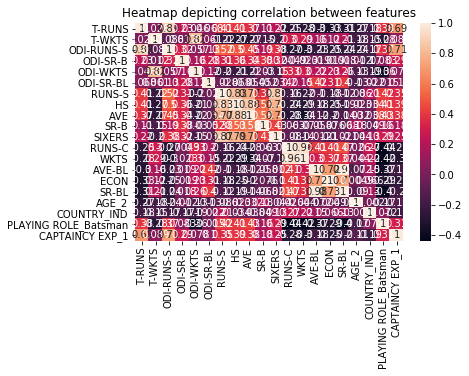

In [54]:
import seaborn as sns
#plt.figure(figsize=(12, 10)
sns.heatmap( X[columns_with_large_vif].corr(), annot = True);
plt.title("Heatmap depicting correlation between features");
#plt.figure(figsize = (12, 10))
plt.show()           

In [55]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE','RUNS-C', 'SR-B', 'AVE-BL', 'ECON',
                                'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [57]:
new_feature = list(set(features) - set(columns_to_be_removed))

In [59]:
get_vif_factors(X[new_feature])

,column,vif
0,COUNTRY_SL,1.519752
1,SIXERS,2.397409
2,COUNTRY_ENG,1.131869
3,CAPTAINCY EXP_1,2.458745
4,ODI-WKTS,2.742889
5,PLAYING ROLE_Batsman,2.680207
6,COUNTRY_PAK,1.334773
7,PLAYING ROLE_Bowler,3.060168
8,PLAYING ROLE_W. Keeper,1.900941
9,COUNTRY_WI,1.194093


In [62]:
X_train = X_train[new_feature]
model_2 = sm.OLS(y_train, X_train).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.760     
Dependent Variable:         SOLD PRICE         AIC:                           2941.5769 
Date:                       2020-11-30 13:32   BIC:                           2989.1760 
No. Observations:           104                Log-Likelihood:                -1452.8   
Df Model:                   18                 F-statistic:                   19.31     
Df Residuals:               86                 Prob (F-statistic):            6.97e-23  
R-squared (uncentered):     0.802              Scale:                         9.6268e+10
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_SL              -99760.1885 121992.3295 -0.8178 0.4158 -342272.9132  142752.5361
SIXERS                    8237.4086   1833.9793  4.4915 0.0000    4591.5784   11883.2387
COUNTRY_ENG             711333.4271 195940.5769  3.6304 0.0005  321816.4520 1100850.4023
CAPTAINCY EXP_1         215911.4914  88356.6333  2.4436 0.0166   40264.3178  391558.6651
ODI-WKTS                  1260.9884    373.8608  3.3729 0.0011     517.7777    2004.1991
PLAYING ROLE_Batsman    147505.4705  93756.5983  1.5733 0.1193  -38876.4783  333887.4194
COUNTRY_PAK              76484.7676 142036.1770  0.5385 0.5916 -205873.8071  358843.3423
PLAYING ROLE_Bowler      70250.7443  91743.5803  0.7657 0.4459 -112129.4572  252630.9457
PLAYING ROLE_W. Keeper   19159.3987 142928.1474  0.1340 0.8937 -264972.3545  303291.1519
COUNTRY_WI              -86956.4069 188905.1397 -0.4603 0.6464 -462487.3957  288574.5820
COUNTRY_SA              -47465.7993 104355.5619 -0.4548 0.6504 -254917.7904  159986.1918
COUNTRY_NZ              130310.0148 139637.8736  0.9332 0.3533 -147280.8907  407900.9202
ODI-SR-BL                 -531.5411   1409.5616 -0.3771 0.7070   -3333.6569    2270.5746
AGE_3                   -42674.2755  90519.1224 -0.4714 0.6385 -222620.3352  137271.7842
COUNTRY_IND             261661.9996  86190.9387  3.0358 0.0032   90320.0843  433003.9150
COUNTRY_BAN            -233547.6549 329780.1802 -0.7082 0.4807 -889128.9556  422033.6458
COUNTRY_ZIM             -90268.1403 349216.4414 -0.2585 0.7966 -784487.4495  603951.1689
WKTS                      2075.0547   1845.5212  1.1244 0.2640   -1593.7200    5743.8295
----------------------------------------------------------------------------------------
Omnibus:                     12.278               Durbin-Watson:                  2.038 
Prob(Omnibus):               0.002                Jarque-Bera (JB):               15.731
Skew:                        0.615                Prob(JB):                       0.000 
Kurtosis:                    4.455                Condition No.:                  1672  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [63]:
significant_var = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS','CAPTAINCY EXP_1']
X_train = X_train[significant_var]
model_3 = sm.OLS(y_train, X_train).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.699     
Dependent Variable:     SOLD PRICE       AIC:                         2952.7612 
Date:                   2020-11-30 13:44 BIC:                         2963.3388 
No. Observations:       104              Log-Likelihood:              -1472.4   
Df Model:               4                F-statistic:                 61.48     
Df Residuals:           100              Prob (F-statistic):          4.10e-26  
R-squared (uncentered): 0.711            Scale:                       1.2067e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       403901.1001  63577.6276 6.3529 0.0000 277764.8976  530037.3025
COUNTRY_ENG       752012.5583 205197.8998 3.6648 0.0004 344905.7694 1159119.3472
SIXERS              8387.9373   1600.7966 5.2399 0.0000   5212.0025   11563.8722
CAPTAINCY EXP_1   333580.1967  72428.0522 4.6057 0.0000 189885.0040  477275.3895
--------------------------------------------------------------------------------
Omnibus:                   1.937             Durbin-Watson:                2.159
Prob(Omnibus):             0.380             Jarque-Bera (JB):             1.373
Skew:                      0.189             Prob(JB):                     0.503
Kurtosis:                  3.417             Condition No.:                164  
================================================================================

"""

# residual analysis

In [71]:
def draw_pp_plot(model, title):
    probplot = sm.ProbPlot(model.resid);
    plt.figure(figsize = (8, 6));
    probplot.ppplot(line = "45");
    plt.title(title);
    plt.show();

<Figure size 576x432 with 0 Axes>

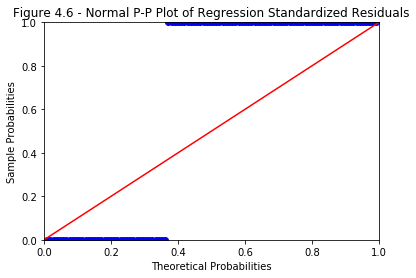

In [72]:
draw_pp_plot(model_3,
                "Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals");

In [73]:
def plot_resid_fitted(fitted, resid, title):
    plt.scatter(fitted, resid);
    plt.title(title)
    plt.xlabel("Standardised predicted values")
    plt.ylabel("Standardised residual values")
    plt.show()

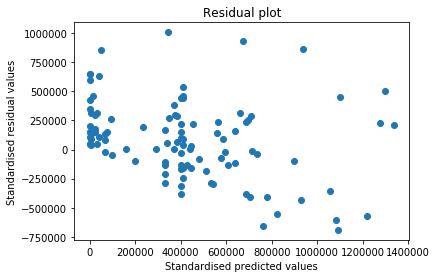

In [76]:
plot_resid_fitted(model_3.fittedvalues, model_3.resid, "Residual plot")

In [77]:
k = X_train.shape[1]
n = X_train.shape[0]

In [78]:
print("number of variables:", k, "number of observations:", n)

number of variables: 4 number of observations: 104


In [80]:
leverage_cutoff = 3*((k+1)/n)
print("cut off leevrage value:", round(leverage_cutoff, 3))

cut off leevrage value: 0.144


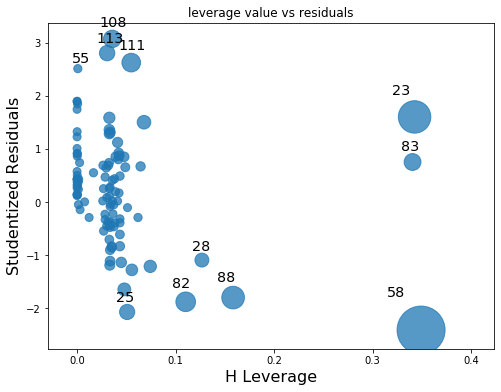

In [81]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize = (8,6))
influence_plot(model_3, ax=ax)
plt.title("leverage value vs residuals")
plt.show()

In [82]:
df6[df6.index.isin([23, 58, 83])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [85]:
X_train_new = X_train.drop([23, 58, 83], axis = 0)
y_train_new = X_train.drop([23, 58, 83], axis = 0)
X_train_new.shape

(101, 4)